In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Since the tuned  Weighted Aggregating classifier has the highest test set roc_auc & one of the best Reward-Risk Ratio ( but sadly slightly bad training time complexity), it is the model of our choice for this problem.

In [2]:
# Loading the test set response variable
y_test = pd.read_csv('y_test.final.csv')

In [3]:
# Loading the weighted aggregating classifier predictions
y_preds = pd.read_csv('Weighted_Classifier_Test_Preds.csv')

In [4]:
# Visualizing the test set response variable
y_test.head()

,TARGET
0,1
1,0
2,0
3,0
4,1


In [5]:
# Visualizing the test set response variable
y_preds.head()

,Weighted_Test_Preds
0,0.826174
1,0.266740
2,0.523683
3,0.272409
4,0.793099


### Calculating the optimal probability threshold value ( It is one where difference between tpr & fpr is max.) from the roc curve that would give us the best TPR or Recall versus FPR on the test or unseen data.

In [6]:
from sklearn.metrics import roc_curve

In [7]:
# Calculating False Positive Rate(fpr), True Positive Rate(tpr) & Prob Threshold values from sklearn's roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

In [8]:
# Finding the best threshold probability
optimal_idx = np.argmax((tpr - fpr))# Optimal threshold is one where diff between tpr & fpr is max.
optimal_threshold = thresholds[optimal_idx]
print("The optimum probability threshold value that gives best model recall vs. fpr is: ",optimal_threshold)

The optimum probability threshold value that gives best model recall vs. fpr is:  0.5039920234281092


In [13]:
# Defining the function for plotting the roc_auc curve
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, color='green', label='Weighted Aggregating Classifier ROC curve')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', Label='Random Guessing ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for the tuned Weighted Aggregating Classifier ROC curve')
    plt.legend()
    plt.show()

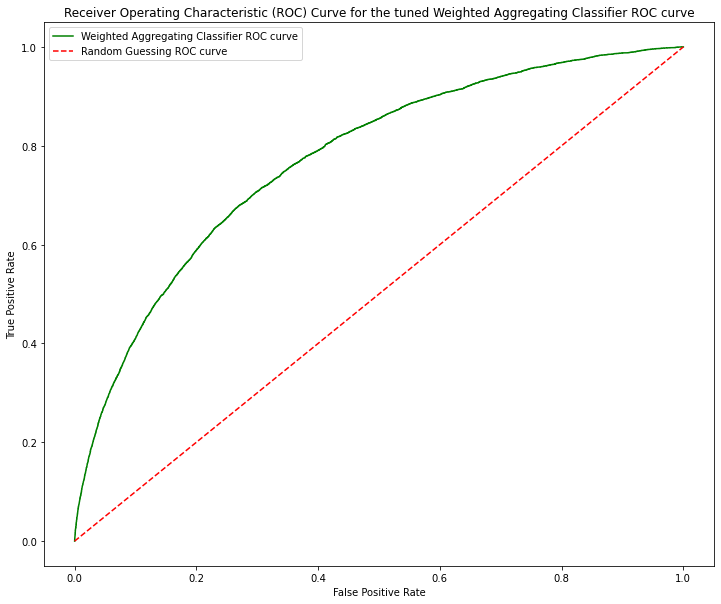

In [14]:
# Plotting the roc curve
plot_roc_curve(fpr, tpr)

In [15]:
# Importing the Sklearn's roc_auc_score module
from sklearn.metrics import roc_auc_score

In [16]:
print('The area under the Random forest classifier roc curve is: ',roc_auc_score(y_test, y_preds))

The area under the Random forest classifier roc curve is:  0.7726740445628326


In [18]:
print('The value of model FPR corresponding to optimal probability threshold is: ',fpr[optimal_idx])

The value of model FPR corresponding to optimal probability threshold is:  0.2696824767942042


In [17]:
print('The value of model recall corresponding to optimal probability threshold is: ',tpr[optimal_idx])

The value of model recall corresponding to optimal probability threshold is:  0.6788591685465678


## Observations:
### 1) The above  calculated (fpr,tpr) point , with coordinates ( 0.2696824767942042, 0.6788591685465678) , corresponding to the optimal probability threshold can be easily seen on the above roc plot.
### 2) Observations for which the classifier outputs the probability >= (Threshold value = 0.5039920234281092) should be labeled as belonging to class 1 , in order to maximize the recall.
